## Load Processed Data

In [2]:
# Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/processed/tiktok_processed.csv')

## 1. Visualize Engagement vs. Time (Hour & Day of Week)

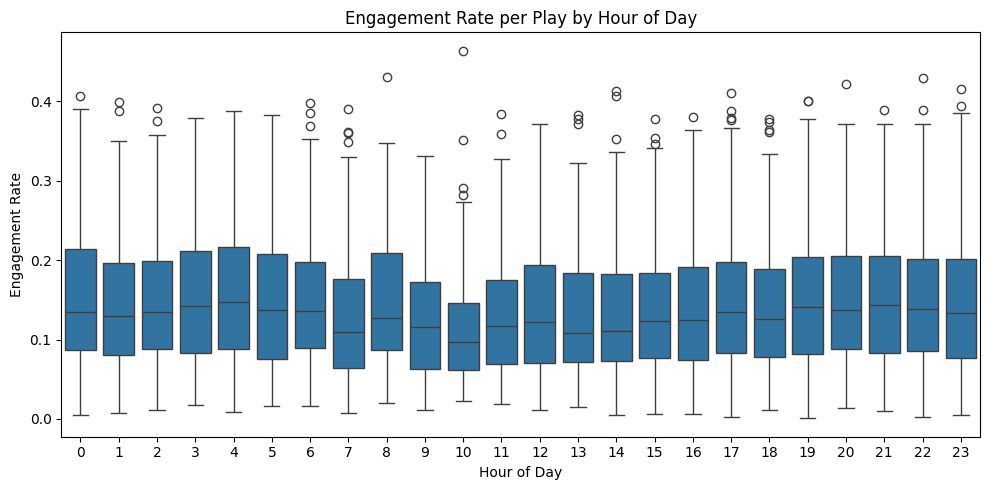

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='create_hour', y='engagement_rate_per_play', data=df)
plt.title("Engagement Rate per Play by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Engagement Rate")
plt.tight_layout()
plt.show()

### Observations for Engagement by Hour of Day:
#### Engagement Rate Is Fairly Consistent Across Hours
1. The median engagement rate stays relatively stable between ~0.10 to ~0.15 throughout the 24-hour period.
2. This suggests that posting time alone may not be the dominant factor for driving engagement.

#### Slightly Higher Engagement Between Midnight to 5 AM
1. Hours 0 to 5 (i.e., midnight to early morning) appear to have slightly higher medians and a wider interquartile range.
2. Creators might see greater variability but also greater upside potential during these off-peak hours.

#### Outliers Present Across All Hours
1. Almost every hour shows high-engagement outliers, indicating viral potential is possible at any time, but rare.
2. These are likely influenced by content quality, trends, or algorithm boosts rather than timing alone.

#### Reduced Engagement Around 10 AM – 12 PM
1. The lower medians during late morning (e.g., hour 10) may suggest these are less optimal posting windows for engagement.

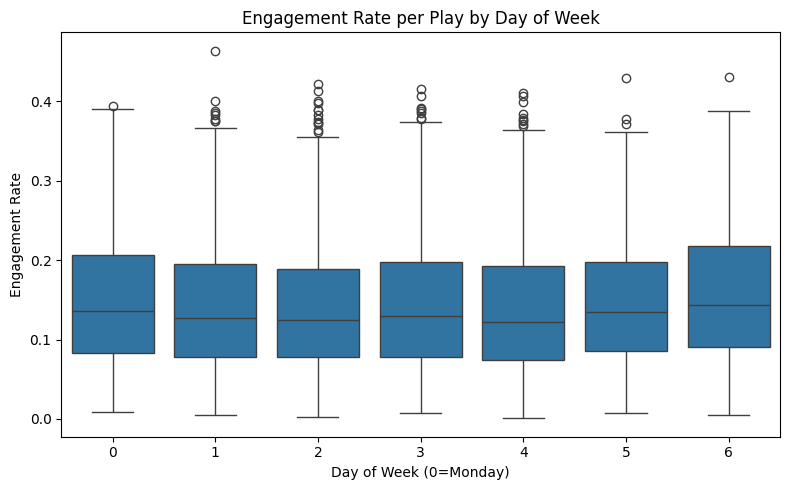

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_of_week', y='engagement_rate_per_play', data=df)
plt.title("Engagement Rate per Play by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Engagement Rate")
plt.tight_layout()
plt.show()

### Observations for Engagement by Day of Week:
#### Engagement Rate Is Fairly Consistent Across Hours
1. Among all days, Sunday clearly shows the highest median and wider upper quartile.
2. This suggests that audiences are more engaged on Sundays, possibly due to more free time and higher content consumption.

#### Monday (Day 0) is a Close Second
1. Engagement also appears to be relatively high on Mondays, which might reflect people browsing content during work breaks or after weekend activity follow-ups.

#### Midweek Days (Tuesday to Thursday) Show Lower Median Engagement
1. Days 1–4 (Tuesday–Friday) have lower medians and similar IQRs, indicating more average and consistent engagement.
2. This could be due to work/school routines impacting user attention and content browsing.

#### Outliers Occur on All Days
1. Every day includes high-performing outliers, meaning viral content can succeed any day if it's compelling and well-targeted.
2. Timing is not a strict limiter of virality.

## 2. Sentiment vs. Popularity (Engagement Rate)

#####             (REFERENCE) Sentiment Polarity and Subjectivity Scale (Typical for TextBlob / VADER)
| Polarity Value    | Meaning             | Example                      |
|-------------------|---------------------|------------------------------|
| **-1.0 to < 0**       | Negative sentiment  | "I hate this"                |
| **0**                 | Neutral sentiment   | "Just a regular day"         |
| **> 0 to 1.0**        | Positive sentiment  | "I love it!"                 |

| Subjectivity Score | Interpretation   | Example Caption               |
| ------------------ | ---------------- | ----------------------------- |
| **0.0**            | Very Objective   | “Video uploaded today.”       |
| **\~0.5**          | Mixed or Neutral | “It might be a fun idea.”     |
| **1.0**            | Very Subjective  | “This is absolutely amazing!” |



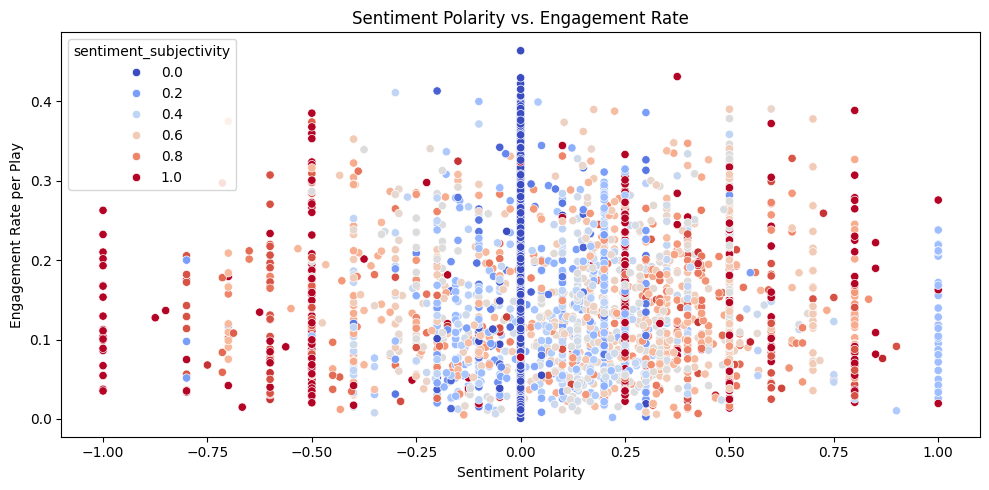

In [22]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sentiment_polarity', y='engagement_rate_per_play', data=df, hue='sentiment_subjectivity', palette='coolwarm')
plt.title("Sentiment Polarity vs. Engagement Rate")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Engagement Rate per Play")
plt.tight_layout()
plt.show()

### Key Interpretations
#### Engagement Happens Across the Sentiment Spectrum
1. Engagement Rate per Play appears across all polarity values — from strongly negative (-1.0) to strongly positive (1.0).
2. This means both positive and negative emotional tones can drive engagement, as long as the content resonates.

#### Neutral Sentiment (Polarity ≈ 0) Dominates Volume
1. A large cluster around polarity = 0 shows neutral descriptions are most common.
2. However, these neutral posts are less likely to reach the higher engagement extremes.

### Highly Subjective Content (Red Dots) is Widely Spread
1. Redder dots (high subjectivity) appear throughout the chart, especially at the higher polarity ends.
2. This indicates that subjective, emotional content is common in both very positive and very negative posts — and it can perform well.

### High Engagement Occurs at All Sentiment Levels
1. Dots above 0.3 engagement rate appear at all sentiment levels, including:
- Negative but expressive posts (polarity < 0, high subjectivity)
- Highly positive posts (polarity > 0.5)
- Even some neutral/objective content (polarity ~ 0, low subjectivity)

## 3. Hashtag Count & Posting Time vs. Engagement

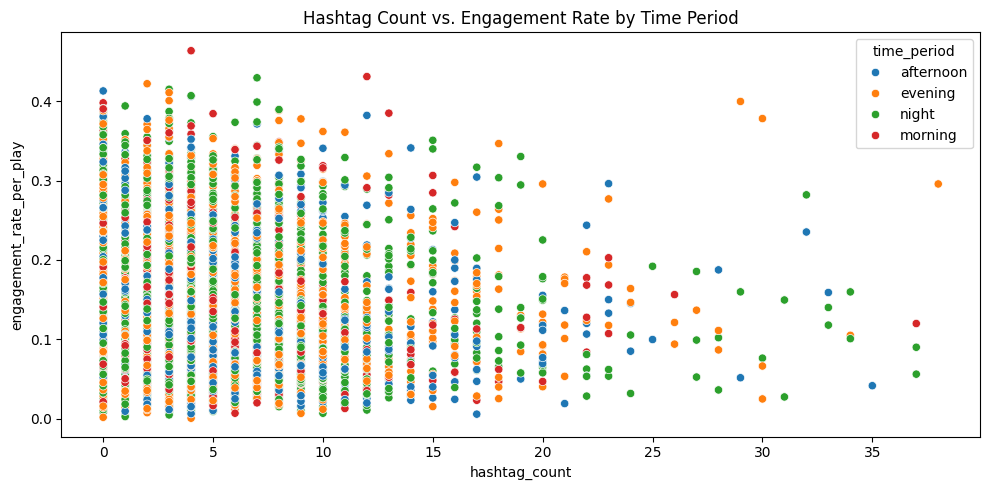

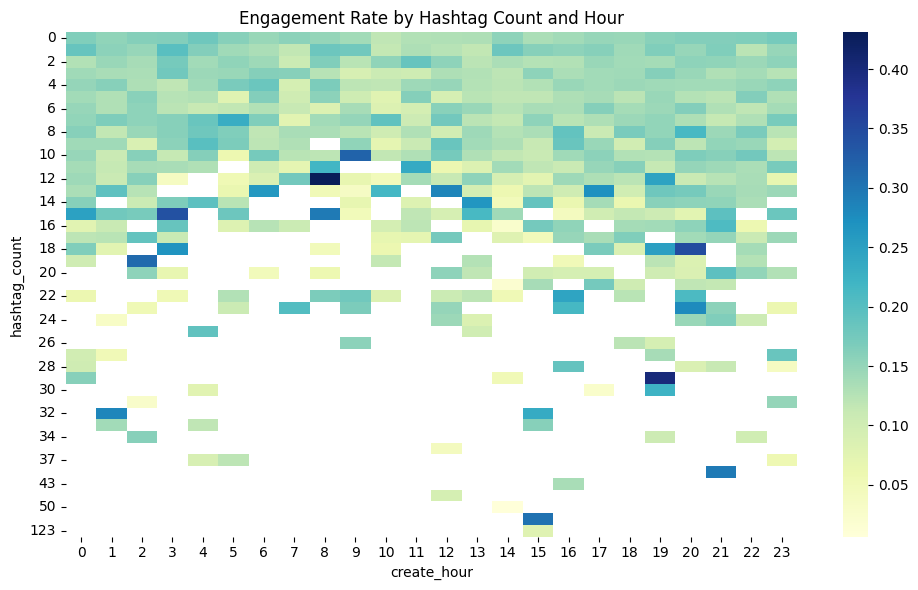

In [23]:
# Define thresholds to exclude outliers
max_hashtags = 40
max_engagement_rate = 0.5

# Filter the DataFrame
filtered_df = df[
    (df['hashtag_count'] <= max_hashtags) &
    (df['engagement_rate_per_play'] <= max_engagement_rate)
]

# Plot again with filtered data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=filtered_df,
    x='hashtag_count',
    y='engagement_rate_per_play',
    hue='time_period'
)
plt.title("Hashtag Count vs. Engagement Rate by Time Period")
plt.tight_layout()
plt.show()

# Optional: Heatmap (Hashtag Count vs Hour)
plt.figure(figsize=(10, 6))
pivot = df.pivot_table(values='engagement_rate_per_play', index='hashtag_count', columns='create_hour')
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title("Engagement Rate by Hashtag Count and Hour")
plt.tight_layout()
plt.show()